In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [ ]:
#Probability
def toss_coin(number_of_tosses=100):
  return pd.Series(np.random.choice(['Heads','Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
  return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [ ]:
# Simulate the coin tosses
results = toss_coin()

# Debugging prints
print("\nResults:", results.head())
print("\nValue Counts:", results.value_counts())

# Print the counts of Heads and Tails
counts = results.value_counts()
print(counts)

# Create the bar chart
fig = pg.Figure([pg.Bar(x=counts.keys(), y=counts.values)])
fig.show()


Results: 0    Heads
1    Heads
2    Tails
3    Tails
4    Tails
dtype: object

Value Counts: Heads    50
Tails    50
Name: count, dtype: int64
Heads    50
Tails    50
Name: count, dtype: int64


In [ ]:
#Derived Probability Distribution-> Binomial Distribution
results=pd.Series([np.sum(toss_coin(20)=='Heads') for _ in range(10000)])
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(), y=results.value_counts().values)])
fig.show()

As number of samples increase, it nearly looks like a bell curve.

In [ ]:
results=pd.Series([np.sum(toss_coin(500)=='Heads') for _ in range (500000)])
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(), y=results.value_counts().values)])
fig.show()

In [ ]:
#How much to Sample-> Regression to mean
results={shots: throw_dice(shots) for shots in [20,100,5000,60000,900000] }
fig=pg.Figure([pg.Bar(x=result.value_counts().keys(), y=result.value_counts().values /shots,)
              for shots, result in results.items()])
fig.add_shape(type='line', x0=0.3, y0=0.231, x1=2.01, y1=1.986, line=dict(color='violet',))
fig.show()


In [45]:
#Expectation Simulation
def number_of_numbered_cards_before_ace(trials=1000, show_trials=5):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'K', 'Q']
    ranks = ['H', 'D', 'C', 'S']
    cards_thrown_counts = []

    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []

        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)

            if picked_card[0] == 'A':
                break

            cards_thrown += 1
            deck_of_cards.remove(picked_card)

        if experiment < show_trials:
            print(cards_thrown, 'cards that were thrown:', ' '.join(cards_pile))

        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_before_ace(3000000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace.')


14 cards that were thrown: 9D 4H 8H KH 6C JS JC 3H 9C JD 4D 9H 2C 10D AC
13 cards that were thrown: 7D 4H 3S 5D 3H 8C KS 4C 4D 9D 10C 9C KD AD
16 cards that were thrown: 6S 7D 10D QS 3C KC 4C KD 5D JH 3H 10S 7S 9D 6C KS AH
24 cards that were thrown: 5D 2D 10S JD 2S 5S KD 5C 4H KS KC 4D 3D 9H 7C 7D QS QC 4S KH 6D 8H 6S 7S AD
8 cards that were thrown: 6S 6D 6C QS 4D 2C 8C KS AS


KeyboardInterrupt: 

In [ ]:
#Probablity Mass Function
results=pd.Series(cards_thrown_counts)
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(), y=results.value_counts().values)])
fig.show()

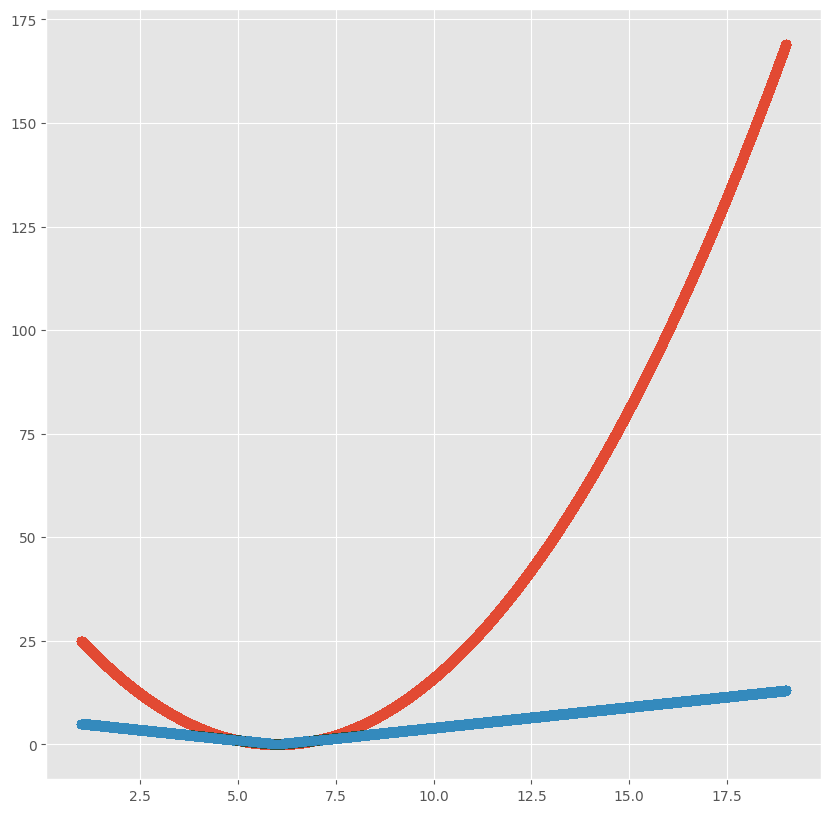

In [12]:
#Mean Squared Error
import numpy as np
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
measurements = np.linspace(1, 19, 10000000)
plt.scatter(measurements, (measurements-6)**2, label='Squared Error')
plt.scatter(measurements, abs(measurements-6), label='Absolute Error')
plt.show()

In [20]:
#Standardization
grades=pd.read_csv('https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv')
print(grades.shape)
grades.agg(['mean', 'var', 'std'])
print(grades.agg)

(26, 4)


TypeError: Could not convert string 'ArnoldBobCassandraDonovanEmilyFabianGromHilaryIvanJohnKevinLoiusMandyNatalieOliverPatrickQuitonRobertSofiaTerryUsmanVanessaWilsonXavierYukiZayn' to numeric

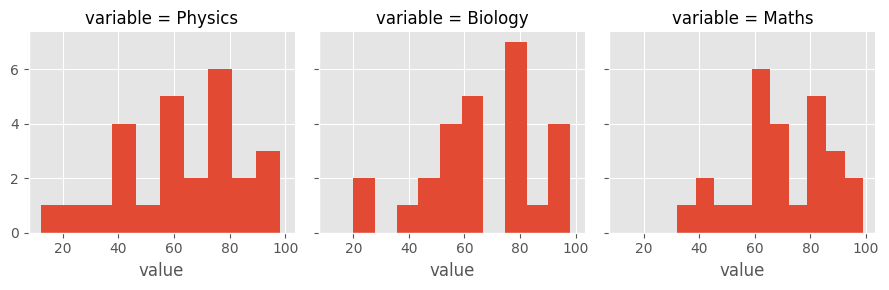

In [17]:
g=sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [25]:
#Standardized Values for all three subjects
grades["Physics_std"]= (grades["Physics"]-grades['Physics'].mean())/grades["Physics"].std()
grades["Maths_std"]= (grades["Maths"]-grades['Maths'].mean())/grades["Maths"].std()
grades["Biology_std"]= (grades["Biology"]-grades['Biology'].mean())/grades["Biology"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std,Biology_std
0,Arnold,80,78,70,0.713673,0.013309,0.512895
1,Bob,60,98,45,-0.165735,-1.428471,1.448703
2,Cassandra,34,56,65,-1.308965,-0.275047,-0.516494
3,Donovan,56,65,32,-0.341616,-2.178196,-0.095380
4,Emily,98,23,55,1.505141,-0.851759,-2.060577


In [37]:
#Binomial Distribution
from scipy.stats import binom
print('Binomial pmf: ', binom.pmf(k=5, n=5, p=0.7))
print('Complement: ', 1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75))
print("Binomial cdf: ", binom.cdf(3, n=5, p=0.75))

Binomial pmf:  0.16806999999999994
Complement:  0.3671875
Binomial cdf:  0.3671875


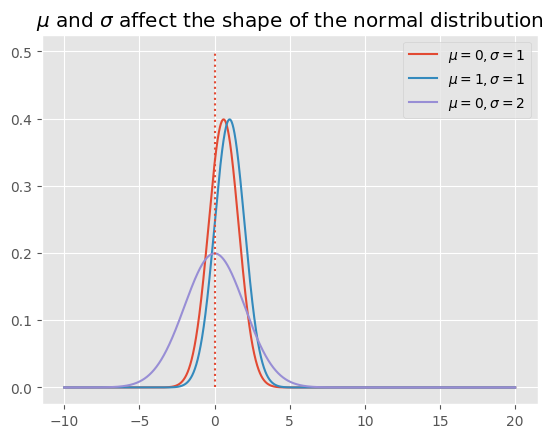

In [40]:
#Normal Distribution
from scipy.stats import norm
x = np.linspace(-10, 20, 5000)
f1 = norm.pdf(x, loc=0.6, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [42]:
norm.ppf(0.5)

0.0

In [43]:
norm.cdf(0)

0.5

Average is  0.999998874797402


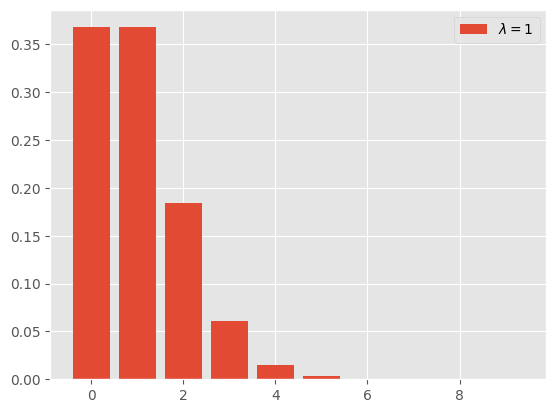

In [52]:
#Poisson Distribution
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)
f24 = poisson.pmf(x, mu=24)
plt.bar(x, f1, label="$\lambda=1$")
plt.legend()
#Finding Average
print('Average is ', x @ f1)

Average is  1.999525105343477


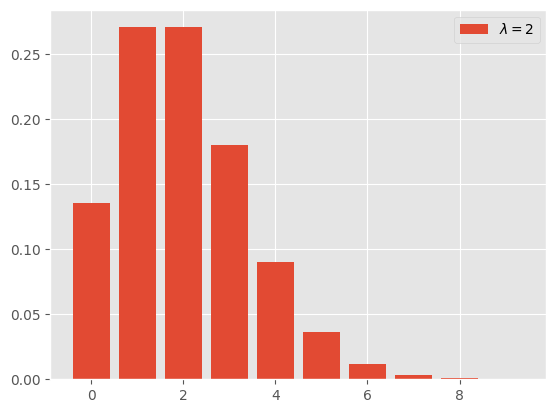

In [48]:
# for lambda=2
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()
print('Average is ',x @ f2)

Average is  2.9885910238149727


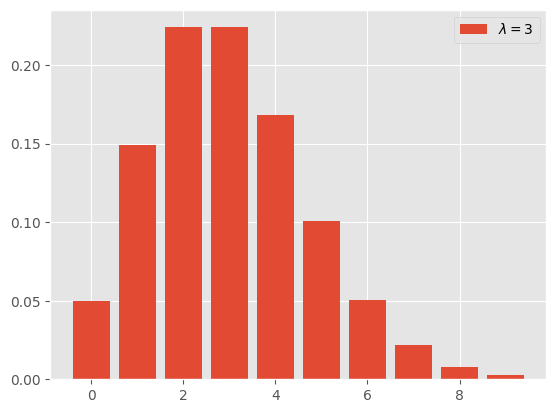

In [50]:
# for lambda=3
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()
print('Average is ',x @ f3)

Average is  0.00361350474311504


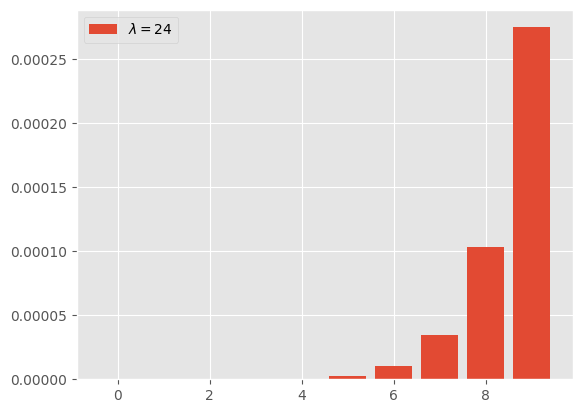

In [53]:
# for lambda=24,
plt.bar(x, f24, label="$\lambda=24$")
plt.legend()
print('Average is ',x @ f24)

In [54]:
poisson.pmf(3, 5)

0.1403738958142805

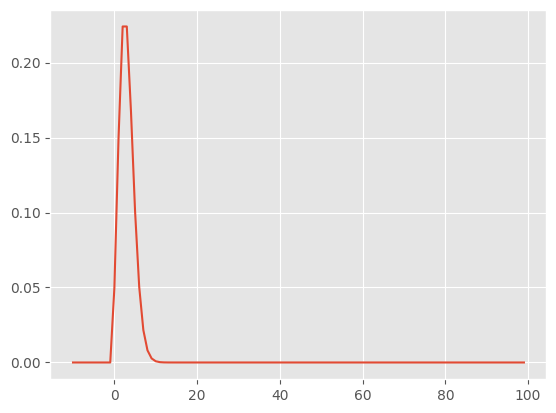

In [57]:
#Central Limit Theorem
from scipy.stats import poisson
bins = np.arange(-10, 100)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)


(array([  3.,  14.,  43., 110., 103.,  71.,  35.,  17.,   3.,   1.]),
 array([1.8  , 2.075, 2.35 , 2.625, 2.9  , 3.175, 3.45 , 3.725, 4.   ,
        4.275, 4.55 ]),
 <BarContainer object of 10 artists>)

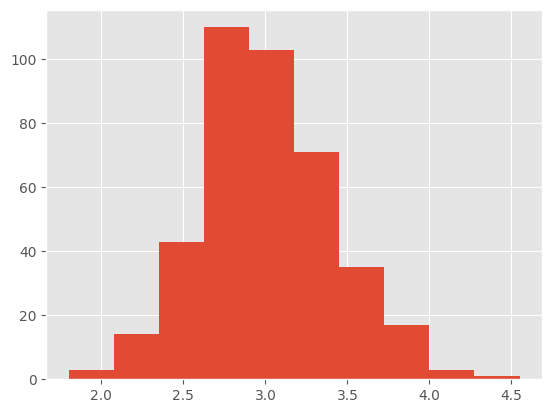

In [58]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

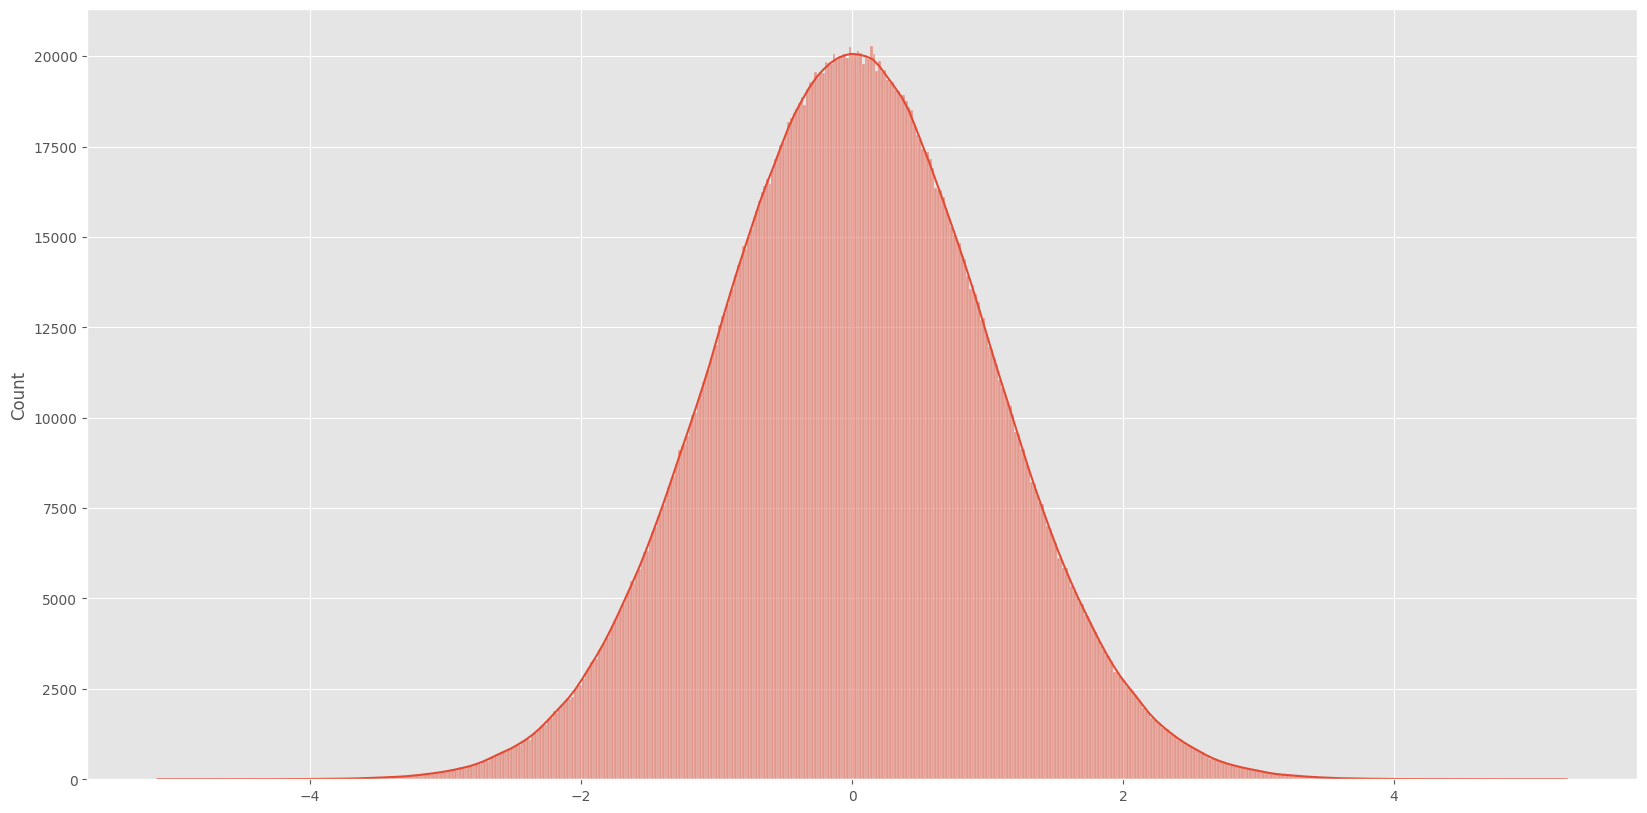

In [59]:
#Normal Distribution in Weight Initialization
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(2560000))
sns.histplot(x, kde=True)
plt.show()

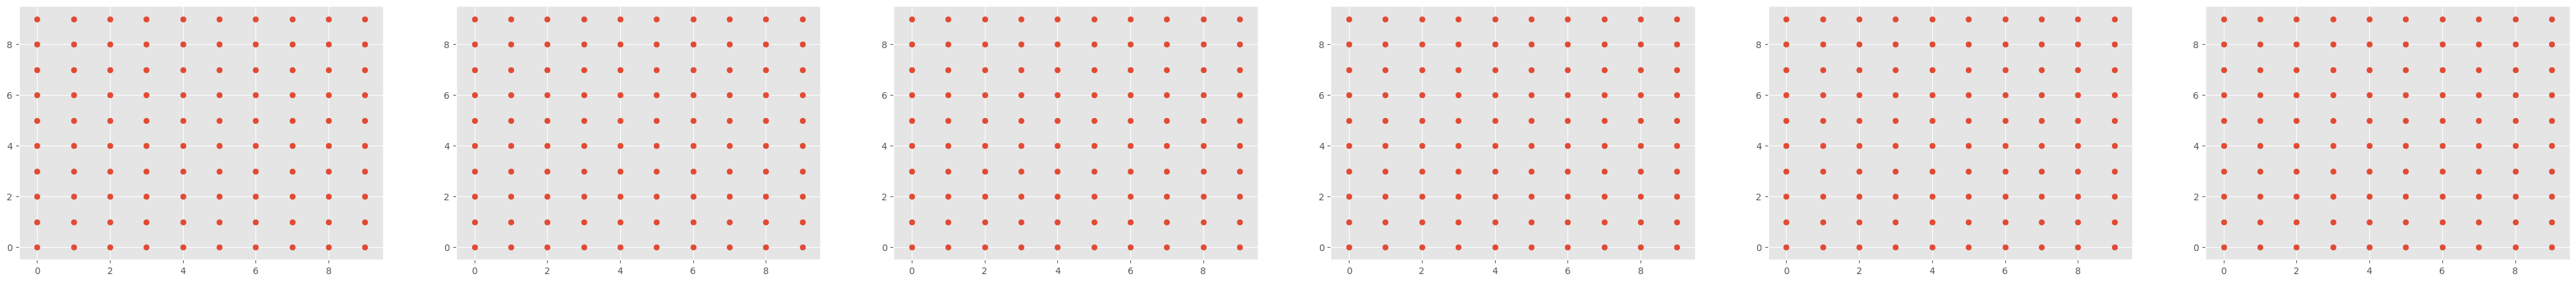

In [65]:
#Entropy
#Solid-Liquid example
#Here its a perfectly shaped solid
fix, axs = plt.subplots(1, 6, figsize=(50, 5))
for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

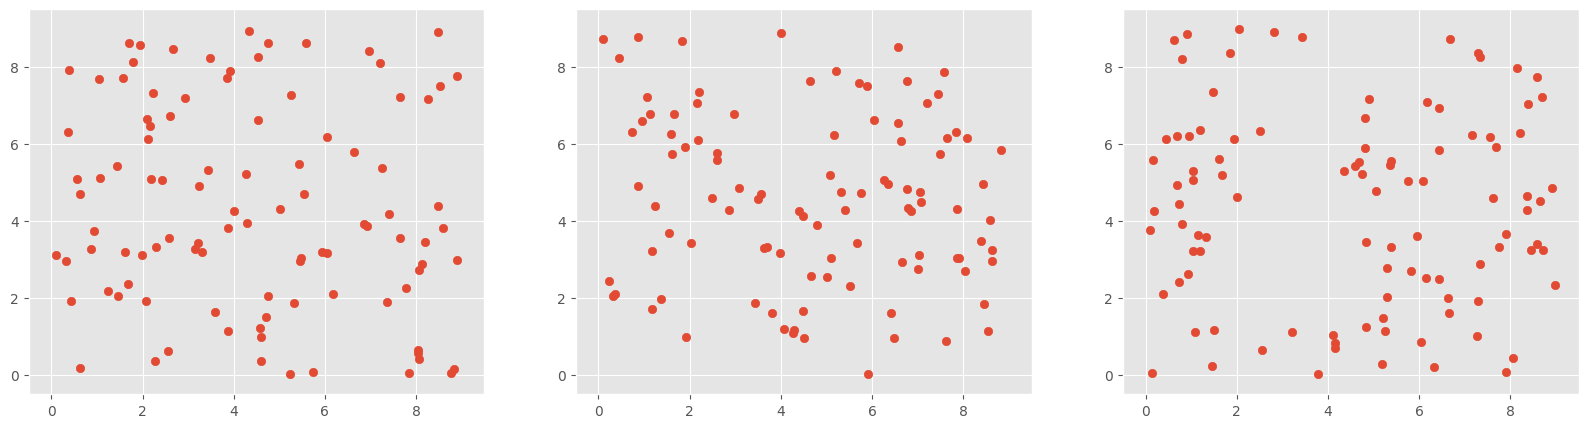

In [69]:
#Gases
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

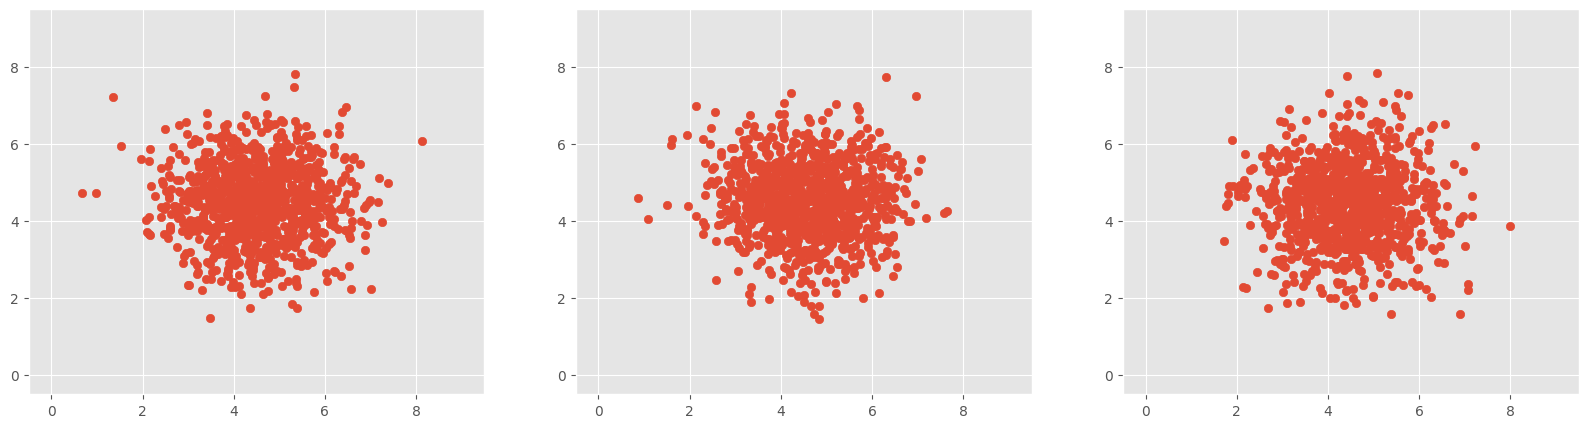

In [67]:
#Some Randomness given size is 1000
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=1000), np.random.normal(loc=4.5, scale=1.0, size=1000)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()